In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

c:\users\prishitaray\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.contrib.layers import fully_connected

In [3]:
training_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_training-set.csv")
testing_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_testing-set.csv")

In [4]:
training_data=np.array(training_df)
testing_data=np.array(testing_df)

In [5]:
training_data.shape

(175341, 45)

In [6]:
training_labels=training_data[:,43]

In [7]:
training_features=training_data[:,0:43]

In [8]:
training_labels

array(['Normal', 'Normal', 'Normal', ..., 'Generic', 'Generic', 'Generic'],
      dtype=object)

In [9]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [10]:
#Integer Encoding Labels
for i in range(0,len(training_labels)):
    if training_labels[i]=='Normal':
        training_labels[i]=0
    elif training_labels[i]=='Fuzzers':
        training_labels[i]=1
    elif training_labels[i]=='Analysis':
        training_labels[i]=2
    elif training_labels[i]=='Backdoor':
        training_labels[i]=3
    elif training_labels[i]=='DoS':
        training_labels[i]=4
    elif training_labels[i]=='Exploits':
        training_labels[i]=5
    elif training_labels[i]=='Generic':
        training_labels[i]=6
    elif training_labels[i]=='Reconaissance':
        training_labels[i]=7
    elif training_labels[i]=='Shellcode':
        training_labels[i]=8
    elif training_labels[i]=='Worms':
        training_labels[i]=9

In [11]:
training_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=object)

In [12]:
proto=np.unique(training_features[:,2])

In [13]:
l=training_features[:,3]
for i in range(0,len(l)):
    if l[i]=='-':
        l[i]=0
    elif l[i]=='dhcp':
        l[i]=1
    elif l[i]=='dns':
        l[i]=2
    elif l[i]=='ftp':
        l[i]=3
    elif l[i]=='ftp-data':
        l[i]=4
    elif l[i]=='http':
        l[i]=5
    elif l[i]=='irc':
        l[i]=6
    elif l[i]=='pop3':
        l[i]=7
    elif l[i]=='radius':
        l[i]=8
    elif l[i]=='smtp':
        l[i]=9
    elif l[i]=='snmp':
        l[i]=10
    elif l[i]=='ssh':
        l[i]=11
    elif l[i]=='ssl':
        l[i]=12

training_features[:,3]=l

In [14]:
training_features[:,3]

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [15]:
np.unique(training_features[:,4])

array(['CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', 'no'],
      dtype=object)

In [16]:
l=training_features[:,4]
for i in range(0,len(l)):
    if l[i]=='CON':
        l[i]=0
    elif l[i]=='ECO':
        l[i]=1
    elif l[i]=='FIN':
        l[i]=2
    elif l[i]=='INT':
        l[i]=3
    elif l[i]=='PAR':
        l[i]=4
    elif l[i]=='REQ':
        l[i]=5
    elif l[i]=='RST':
        l[i]=6
    elif l[i]=='URN':
        l[i]=7
    elif l[i]=='no':
        l[i]=8

training_features[:,4]=l

In [17]:
training_features[:,4]

array([2, 2, 2, ..., 3, 3, 3], dtype=object)

In [18]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [19]:
proto

array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
       'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
       'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
       'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
       'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
       'icmp', 'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il',
       'ip', 'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
       'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
       'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
       'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
       'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
       'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
       'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rtp', 'rvd', 'sat-expak',
       'sat-mon', 'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp',
       'sep', 'skip'

In [20]:
d=dict.fromkeys(proto)

In [21]:
l=d.keys()

In [22]:
v=0
for x in l:
    d[x]=v
    v=v+1

In [23]:
proto_list=training_features[:,2]
for i in range(0,len(proto_list)):
    for j in l:
        if proto_list[i]==j:
            proto_list[i]=d[j]

training_features[:,2]=proto_list

In [24]:
training_features

array([[1, 0.121478, 29, ..., 1, 1, 0],
       [2, 0.6499020000000001, 29, ..., 1, 6, 0],
       [3, 1.623129, 29, ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 115, ..., 3, 12, 0],
       [175340, 9e-06, 115, ..., 30, 30, 0],
       [175341, 9e-06, 115, ..., 30, 30, 0]], dtype=object)

In [25]:
training_features[:,2]

array([29, 29, 29, ..., 115, 115, 115], dtype=object)

In [26]:
training_features.shape

(175341, 43)

In [27]:
std_list=[]

In [28]:
#Perform normalization on dataset
for i in range(0,43):
    mean=np.mean(training_features[:,i])
    std=np.std(training_features[:,i])
    std_list.append(std)
    for j in range(0,175341):
        training_features[j][i]=(training_features[j][i]-mean)/std
        

In [29]:
training_features

array([[-1.7320409294122083, -0.1910288091606379, -0.9907313167166802,
        ..., -0.715713656611942, -0.7530740174877311,
        -0.12650796304403503],
       [-1.7320211730425332, -0.10948479464168344, -0.9907313167166802,
        ..., -0.715713656611942, -0.28825700778157093,
        -0.12650796304403503],
       [-1.7320014166728581, 0.04069921785252289, -0.9907313167166802,
        ..., -0.5955425666085573, -0.28825700778157093,
        -0.12650796304403503],
       ...,
       [1.7320014166728581, -0.2097733588018406, 1.0350256394248076, ...,
        -0.4753714766051727, 0.26952340386582113, -0.12650796304403503],
       [1.7320211730425332, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503],
       [1.7320409294122083, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503]],
      dtype=object)

In [30]:
std_list

[50616.5867741659,
 6.480230377634532,
 42.45326653786071,
 2.305144095553943,
 0.8679394065384229,
 136.88720656043952,
 110.25795617029418,
 174765.14594941295,
 143653.8080748578,
 165400.5068013864,
 102.93971751397288,
 110.5065480561588,
 188356909.88190487,
 2421305.4841721063,
 66.00487031558049,
 52.73284891995271,
 7242.225189039217,
 987.0903799600004,
 44965.718295016995,
 4061.0317006883483,
 127.00066200116235,
 1355260384.6054034,
 1353995685.173201,
 126.88616771391364,
 0.07935374554184842,
 0.043399659749737765,
 0.040506240405952354,
 204.67677593269065,
 258.3163193739851,
 0.7769085707482282,
 54207.81271516606,
 10.704300696224685,
 0.9544033774218443,
 8.052453421725263,
 8.047081250439838,
 5.783568568849495,
 10.956154333405415,
 0.12604768794778642,
 0.12604768794778642,
 0.7012056071913747,
 8.321468998673767,
 10.75692131654307,
 0.12451518899845022]

In [31]:
num_inputs=43
num_hid1=22
num_hid2=10
num_hid3=22
num_output=43

In [289]:
lr=0.01
actf=tf.nn.elu

In [290]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [291]:
initializer=tf.variance_scaling_initializer()

In [292]:
w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_output]),dtype=tf.float32)

In [293]:
b1=tf.Variable(tf.zeros(num_hid1))
b2=tf.Variable(tf.zeros(num_hid2))
b3=tf.Variable(tf.zeros(num_hid3))
b4=tf.Variable(tf.zeros(num_output))

In [294]:
hid_layer1=actf(tf.matmul(X,w1)+b1)
hid_layer2=actf(tf.matmul(hid_layer1,w2)+b2)
hid_layer3=actf(tf.matmul(hid_layer2,w3)+b3)
output_layer=actf(tf.matmul(hid_layer3,w4)+b4)

In [295]:
def show_hist_of_weight(all_weight_list,status='before'):
    fig = plt.figure()
    weight_index = 0

    for i in range(1,1+int(len(all_weight_list)//3)):
        ax = fig.add_subplot(1,4,i)
        ax.grid(False)
        temp_weight_list = all_weight_list[weight_index:weight_index+3]
        for temp_index in range(len(temp_weight_list)):
            current_flat = temp_weight_list[temp_index].flatten()
            ax.hist(current_flat,histtype='step',bins='auto',label=str(temp_index+weight_index))
            ax.legend()
        ax.set_title('From Layer : '+str(weight_index+1)+' to '+str(weight_index+3))
        weight_index = weight_index + 3
    plt.savefig('viz/weights_'+str(status)+"_training.png")
    plt.close('all')

In [296]:
loss=tf.reduce_mean(tf.square(output_layer-X))

In [297]:
optimizer=tf.train.AdamOptimizer(lr)
train=optimizer.minimize(loss)

In [298]:
init=tf.global_variables_initializer()

In [299]:
num_epoch=500
batch_size=10000

In [300]:
def next_batch(num, data):
    '''
    Return a total of `num` random samples 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]

    return np.asarray(data_shuffle)

In [301]:
x=[]
y=[]
l=[]

In [302]:
with tf.Session() as sess:
    sess.run(init)
    vars=tf.trainable_variables()
    vars_vals=sess.run(vars)
    for epoch in range(num_epoch):
        num_batches=len(training_features)//batch_size
        #learning rate decay
        lr = lr * (0.5 **(epoch//25))
        for iteration in range(num_batches):
            X_batch=next_batch(batch_size,training_features)
            sess.run(train,feed_dict={X:X_batch})
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        x.append(epoch)
        y.append(train_loss)
    for var, val in zip(vars, vars_vals):
        if var.get_shape()==(43, 22):
            l=val
print(l)  

epoch 0 loss 0.4531344175338745
epoch 1 loss 0.27321356534957886
epoch 2 loss 0.16712543368339539
epoch 3 loss 0.24240832030773163
epoch 4 loss 0.12408886849880219
epoch 5 loss 0.16607074439525604
epoch 6 loss 0.10344378650188446
epoch 7 loss 0.09700212627649307
epoch 8 loss 0.08782805502414703
epoch 9 loss 0.08170878142118454
epoch 10 loss 0.08481907099485397
epoch 11 loss 0.07134884595870972
epoch 12 loss 0.07090931385755539
epoch 13 loss 0.06732207536697388
epoch 14 loss 0.06531544774770737
epoch 15 loss 0.06707456707954407
epoch 16 loss 0.06417620182037354
epoch 17 loss 0.06326940655708313
epoch 18 loss 0.05813988298177719
epoch 19 loss 0.05972357466816902
epoch 20 loss 0.05731982737779617
epoch 21 loss 0.05835375189781189
epoch 22 loss 0.05738290399312973
epoch 23 loss 0.05606752634048462
epoch 24 loss 0.054072942584753036
epoch 25 loss 0.05162519961595535
epoch 26 loss 0.05101408809423447
epoch 27 loss 0.05398961156606674
epoch 28 loss 0.054185912013053894
epoch 29 loss 0.0516857

epoch 236 loss 0.033067163079977036
epoch 237 loss 0.03276054561138153
epoch 238 loss 0.03167571872472763
epoch 239 loss 0.03181891515851021
epoch 240 loss 0.033313725143671036
epoch 241 loss 0.03380925580859184
epoch 242 loss 0.031808361411094666
epoch 243 loss 0.032984137535095215
epoch 244 loss 0.03628915548324585
epoch 245 loss 0.03296952694654465
epoch 246 loss 0.0334554947912693
epoch 247 loss 0.03445044159889221
epoch 248 loss 0.03439023345708847
epoch 249 loss 0.031930167227983475
epoch 250 loss 0.03196031600236893
epoch 251 loss 0.03362220525741577
epoch 252 loss 0.03283630684018135
epoch 253 loss 0.031945668160915375
epoch 254 loss 0.032895658165216446
epoch 255 loss 0.03404448181390762
epoch 256 loss 0.03252451866865158
epoch 257 loss 0.03065606765449047
epoch 258 loss 0.03222310543060303
epoch 259 loss 0.03204885497689247
epoch 260 loss 0.033751726150512695
epoch 261 loss 0.03249098360538483
epoch 262 loss 0.03385486081242561
epoch 263 loss 0.03283267468214035
epoch 264 los

epoch 469 loss 0.030015023425221443
epoch 470 loss 0.03093346394598484
epoch 471 loss 0.03046855330467224
epoch 472 loss 0.03071112185716629
epoch 473 loss 0.03246194124221802
epoch 474 loss 0.030930759385228157
epoch 475 loss 0.03404434397816658
epoch 476 loss 0.0327032133936882
epoch 477 loss 0.030473073944449425
epoch 478 loss 0.03150025010108948
epoch 479 loss 0.030960647389292717
epoch 480 loss 0.03225791081786156
epoch 481 loss 0.031197024509310722
epoch 482 loss 0.03274403512477875
epoch 483 loss 0.02927262894809246
epoch 484 loss 0.031773678958415985
epoch 485 loss 0.031615424901247025
epoch 486 loss 0.030870212242007256
epoch 487 loss 0.03065350279211998
epoch 488 loss 0.031782180070877075
epoch 489 loss 0.03043859638273716
epoch 490 loss 0.03164967894554138
epoch 491 loss 0.03026336245238781
epoch 492 loss 0.03169994801282883
epoch 493 loss 0.031115369871258736
epoch 494 loss 0.030883321538567543
epoch 495 loss 0.03189484775066376
epoch 496 loss 0.03104547969996929
epoch 497 

In [303]:
sum_weights=[]
for row in l:
    total_weight=0
    for a in row:
        total_weight+=a
    sum_weights.append(total_weight)

In [304]:
sum_weights

[-0.427984737791121,
 0.5041913902387023,
 -0.05429937783628702,
 -0.11058939434587955,
 0.6495662829838693,
 -0.7738798372447491,
 -0.4614885747432709,
 0.4666438978165388,
 0.3022637653630227,
 -0.3482034862972796,
 -0.2485786508768797,
 -0.7205295963212848,
 -0.16972158587304875,
 0.22540449211373925,
 0.6344299791380763,
 0.2520760796032846,
 -0.7065550084225833,
 -0.35162567254155874,
 0.8026347318664193,
 -0.00047981273382902145,
 -0.0687573915347457,
 0.3865116722881794,
 0.2399711851903703,
 -0.9901413023180794,
 -0.6638012593175517,
 -1.5791958514600992,
 1.0918580600991845,
 0.015271273732651025,
 0.8234639260917902,
 0.45331649109721184,
 -1.3470771238207817,
 0.02436975296586752,
 -0.8480224299710244,
 -0.31828555651009083,
 -0.11283503472805023,
 -0.2228801327291876,
 0.07878682418959215,
 0.860773722990416,
 0.4309514816850424,
 -0.45890095859067515,
 -0.18528567720204592,
 1.1224199812859297,
 0.3383674193173647]

In [305]:
var_imp=[]
for i in range(0,len(sum_weights)):
    prod=sum_weights[i]
    var_imp.append(prod)

In [307]:
var_imp

[-0.427984737791121,
 0.5041913902387023,
 -0.05429937783628702,
 -0.11058939434587955,
 0.6495662829838693,
 -0.7738798372447491,
 -0.4614885747432709,
 0.4666438978165388,
 0.3022637653630227,
 -0.3482034862972796,
 -0.2485786508768797,
 -0.7205295963212848,
 -0.16972158587304875,
 0.22540449211373925,
 0.6344299791380763,
 0.2520760796032846,
 -0.7065550084225833,
 -0.35162567254155874,
 0.8026347318664193,
 -0.00047981273382902145,
 -0.0687573915347457,
 0.3865116722881794,
 0.2399711851903703,
 -0.9901413023180794,
 -0.6638012593175517,
 -1.5791958514600992,
 1.0918580600991845,
 0.015271273732651025,
 0.8234639260917902,
 0.45331649109721184,
 -1.3470771238207817,
 0.02436975296586752,
 -0.8480224299710244,
 -0.31828555651009083,
 -0.11283503472805023,
 -0.2228801327291876,
 0.07878682418959215,
 0.860773722990416,
 0.4309514816850424,
 -0.45890095859067515,
 -0.18528567720204592,
 1.1224199812859297,
 0.3383674193173647]

In [282]:
features=list(range(1,44))
feature_names=list(training_df)
feature_names

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [308]:
plt.rcParams['figure.figsize']=(20,20)

Text(0,0.5,'Feature Importance Values')

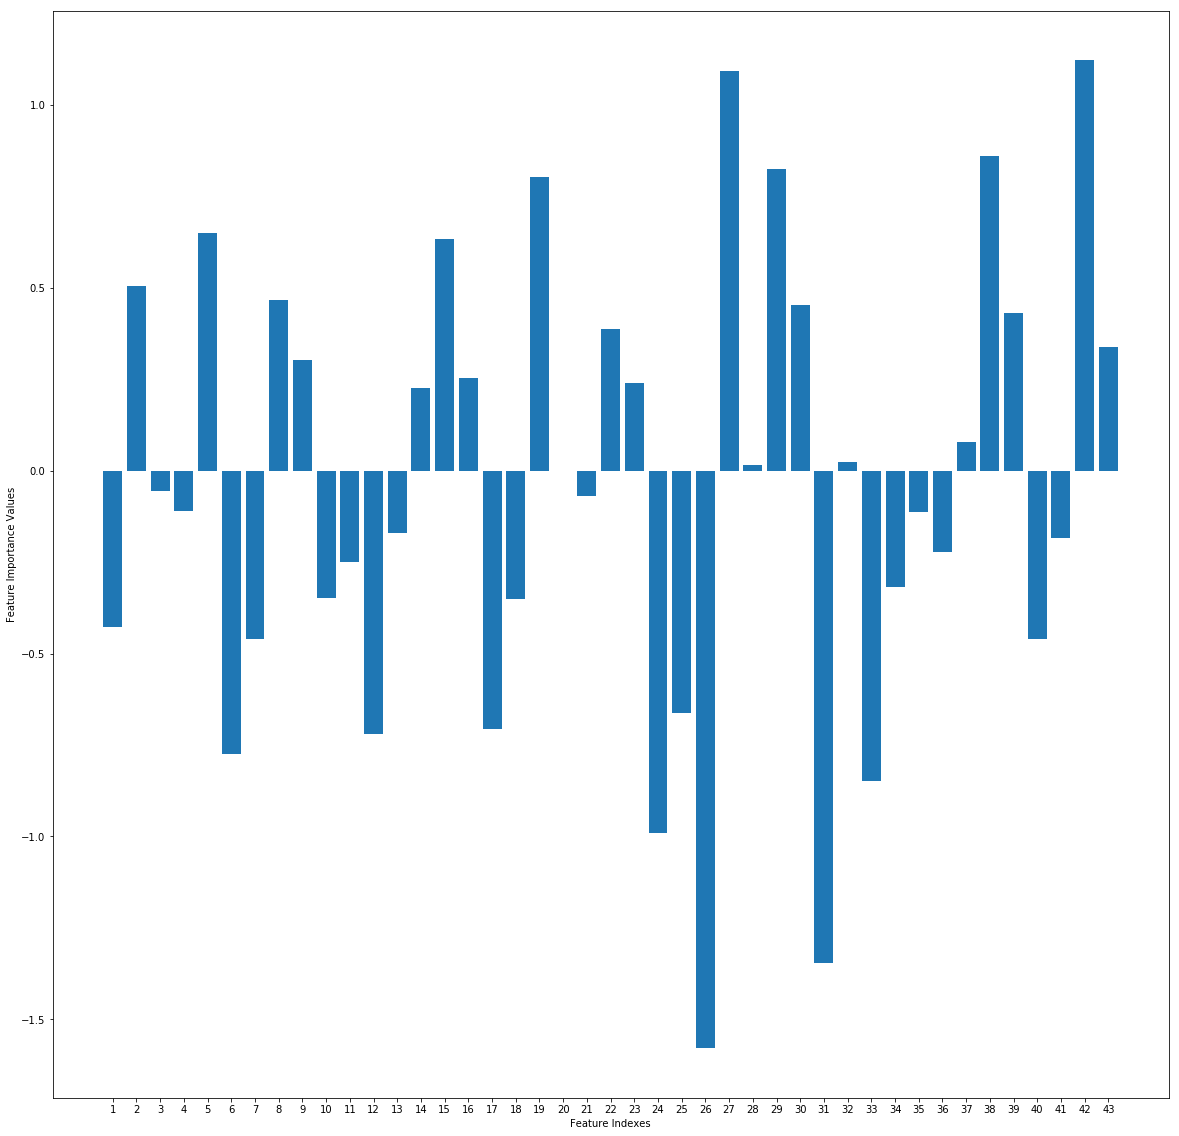

In [309]:
x_vals=np.arange(len(features))
plt.bar(x_vals,var_imp,align='center',alpha=1)
plt.xticks(x_vals,features)
plt.xlabel("Feature Indexes")
plt.ylabel("Feature Importance Values")


In [310]:
best_features=sorted(range(len(var_imp)), key=lambda i: var_imp[i], reverse=True)[:10]

In [311]:
for i in best_features:
    print(feature_names[i])

ct_srv_dst
ackdat
is_ftp_login
dmean
sjit
state
sloss
dur
sbytes
trans_depth


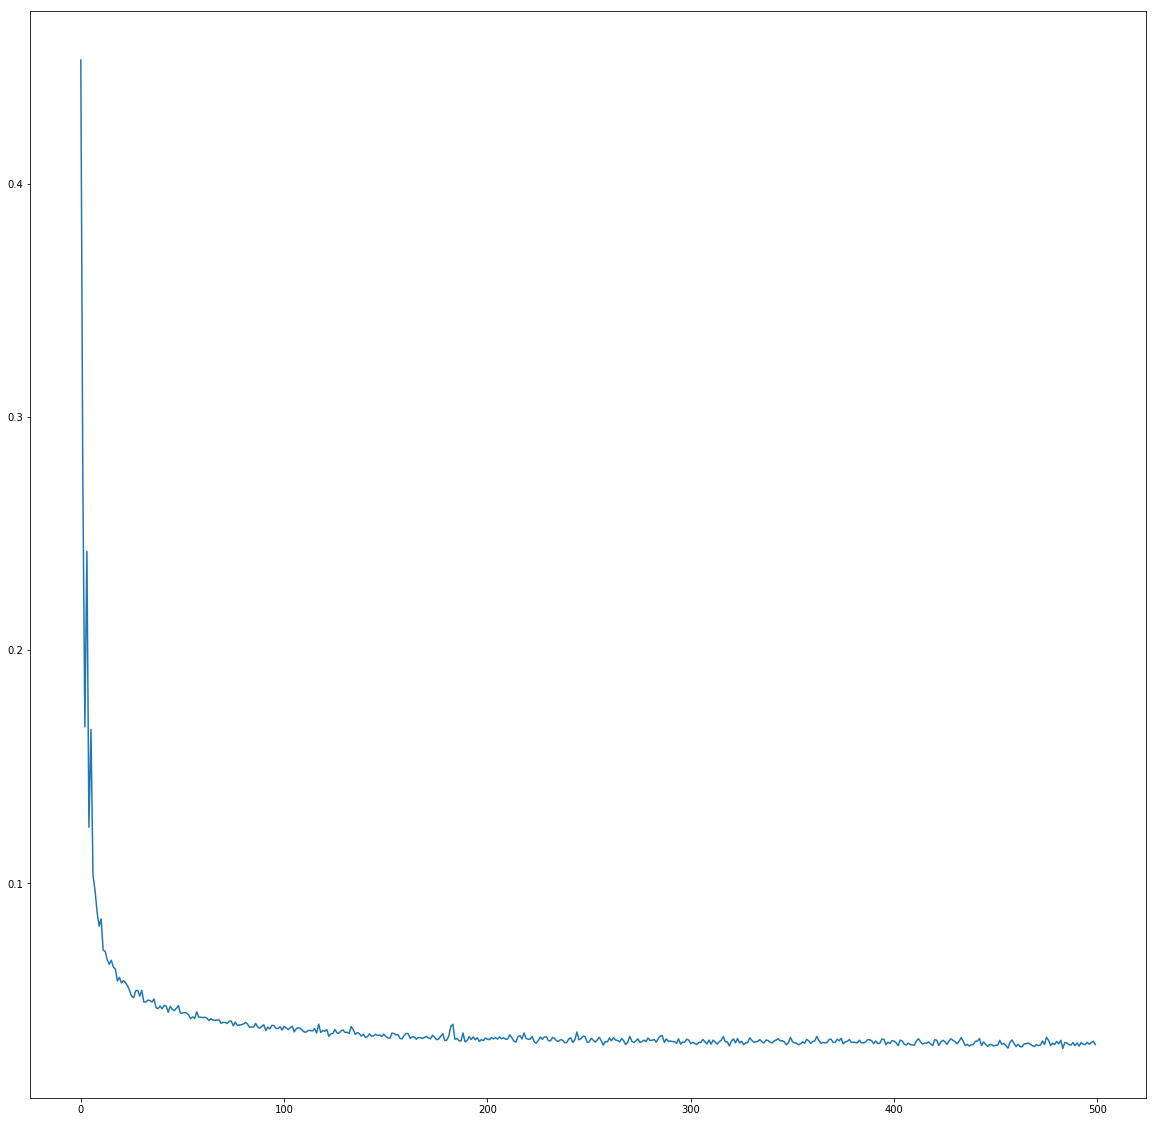

In [312]:
plt.rcParams['figure.figsize']=(20,20)
plt.plot(x,y)

In [313]:
print(np.var(var_imp))

0.3700735361062973
